# Feed in samples

Just want to check individual samples + new images from the internet and effect on logit differences.

In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import os
import logging
import json
import random

import numpy as np
import json
from tqdm.notebook import tqdm

import pandas as pd


In [2]:
# Load imagenet


# Path to your imagenet_class.json file
json_file_path = '/home/mila/s/sonia.joseph/ViT-Planetarium/my_draft/test_nbs/imagenet_class_index.json'
imagenet_path = '/network/datasets/imagenet.var/imagenet_torchvision/val/'

# Load the JSON file into a Python dictionary
with open(json_file_path, 'r') as file:
    num_to_word_dict = json.load(file)

# Create a reverse dictionary for word to number mapping
word_to_num_dict = {}
for num, words in num_to_word_dict.items():
    for word in words:  # Assuming each entry in num_to_word_dict is a list of words
        word_to_num_dict[word] = num

# Function to get the class name from a label
def get_class_name(label):
    # Assuming the label maps to a list of class names
    return num_to_word_dict.get(str(label), ["Unknown label"])[1]

# Function to get the label from a class name
def get_label(class_name):
    return word_to_num_dict.get(class_name, "Unknown class name")

# Get class names
imagenet_class_nums = np.arange(0, 1000, 1)
imagenet_class_names = ["{}".format(get_class_name(i)) for i in imagenet_class_nums]

# Set the seed. You don't need indices if data is loaded in same order every time.
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Function to load images based on saved order
def load_images_in_order(indices_path, imagenet_dataset):
    indices = np.load(indices_path)
    subset_dataset = Subset(imagenet_dataset, indices)
    data_loader = DataLoader(subset_dataset, batch_size=1)
    return data_loader

# Load the ImageNet dataset
batch_size = 1
imagenet_data = datasets.ImageFolder(imagenet_path, transform=data_transforms)
data_loader = load_images_in_order('imagenet_sample_indices.npy', imagenet_data)
len(data_loader)

500

# Mean-ablations

Construct a cup concept class from the ImageNet-1k hierarchy. Do vessel + beverage + glass + container. This is imperfect but a good starting piont.


Classification based on wordnet hierarchy https://observablehq.com/@mbostock/imagenet-hierarchy




In [3]:
# Construct a cup class
# Do vessel + beverage + glass + container
# Based on this https://observablehq.com/@mbostock/imagenet-hierarchy


cup_classes = [
    "measuring_cup",
    "coffee_mug",
    "water_jug",
    "whiskey_jug",
    "beer_bottle",
    "pill_bottle",
    "pop_bottle",
    "water_bottle",
    "wine_bottle",
    "washbasin",
    "beaker",
    "vase",
    "cauldron",
    "coffeepot",
    "teapot",
    "barrel",
    "bathtub",
    "bucket",
    "ladle",
    "mortar",
    "pitcher",
    "tub",
    "mixing_bowl",
    "soup_bowl",
    "Petri dish",
    "milk_can",
    "beer_glass",
    "goblet",
    "cocktail_shaker",
    "saltshaker",
    "pot",
    "thimble",
    "hot_pot",
    "trifle",
    "consomme",
    "espresso",
    "red_wine",
    "cup",
    "eggnog"
]


In [4]:
def is_match(imagenet_class, target_classes):
    words = imagenet_class.split()
    for target in target_classes:
        target_words = target.split()
        if all(word in words for word in target_words):
            return True
    return False
matching_classes = [cls for cls in imagenet_class_names if is_match(cls, cup_classes)]


In [5]:
dog_classes = [
    "chihuahua",
    "japanese_spaniel",
    "maltese_dog",
    "pekinese",
    "shih-tzu",
    "blenheim_spaniel",
    "papillon",
    "toy_terrier",
    "rhodesian_ridgeback",
    "afghan_hound",
    "basset",
    "beagle",
    "bloodhound",
    "bluetick",
    "black-and-tan_coonhound",
    "walker_hound",
    "english_foxhound",
    "redbone",
    "borzoi",
    "irish_wolfhound",
    "italian_greyhound",
    "whippet",
    "ibizan_hound",
    "norwegian_elkhound",
    "otterhound",
    "saluki",
    "scottish_deerhound",
    "weimaraner",
    "staffordshire_bullterrier",
    "american_staffordshire_terrier",
    "bedlington_terrier",
    "border_terrier",
    "kerry_blue_terrier",
    "irish_terrier",
    "norfolk_terrier",
    "norwich_terrier",
    "yorkshire_terrier",
    "wire-haired_fox_terrier",
    "lakeland_terrier",
    "sealyham_terrier",
    "airedale",
    "cairn",
    "australian_terrier",
    "dandie_dinmont",
    "boston_bull",
    "miniature_schnauzer",
    "giant_schnauzer",
    "standard_schnauzer",
    "scotch_terrier",
    "tibetan_terrier",
    "silky_terrier",
    "soft-coated_wheaten_terrier",
    "west_highland_white_terrier",
    "lhasa",
    "flat-coated_retriever",
    "curly-coated_retriever",
    "golden_retriever",
    "labrador_retriever",
    "chesapeake_bay_retriever",
    "german_short-haired_pointer",
    "vizsla",
    "english_setter",
    "irish_setter",
    "gordon_setter",
    "brittany_spaniel",
    "clumber",
    "english_springer",
    "welsh_springer_spaniel",
    "cocker_spaniel",
    "sussex_spaniel",
    "irish_water_spaniel",
    "kuvasz",
    "schipperke",
    "groenendael",
    "malinois",
    "briard",
    "kelpie",
    "komondor",
    "old_english_sheepdog",
    "shetland_sheepdog",
    "collie",
    "border_collie",
    "bouvier_des_flandres",
    "rottweiler",
    "german_shepherd",
    "doberman",
    "miniature_pinscher",
    "greater_swiss_mountain_dog",
    "bernese_mountain_dog",
    "appenzeller",
    "entlebucher",
    "boxer",
    "bull_mastiff",
    "tibetan_mastiff",
    "french_bulldog",
    "great_dane",
    "saint_bernard",
    "eskimo_dog",
    "malamute",
    "siberian_husky"
]


In [6]:
matching_classes = [cls for cls in imagenet_class_names if is_match(cls, dog_classes)]


In [7]:
# Get average of dog neurons from cached activations
def load_cached_act(layer_num, save_path = '/network/scratch/s/sonia.joseph/clip_mechinterp/tinyclip/mini_dataset/'):
    """
    Load cached activations and calculate per-neuron z-scores.
    """

    file_name = f'mlp_fc1_{layer_num}.npz'
    loaded = pd.read_parquet(os.path.join(save_path, file_name))

    return loaded
    
    
layer_num = 7
loaded = load_cached_act(layer_num)

In [8]:
# Take loaded dataset and calculate average activation_value per neuron of all dog-classes

avg_dog_activation = loaded[loaded['class_name'].isin(dog_classes)].groupby('neuron_idx')['activation_value'].mean()
avg_dog_activation

avg_cup_activation = loaded[loaded['class_name'].isin(cup_classes)].groupby('neuron_idx')['activation_value'].mean()

In [9]:
print(avg_cup_activation.iloc[128])
print(avg_dog_activation.iloc[128])

-0.5700862557415344
-1.5201441726844929


In [10]:
# Load CLIP model
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("wkcn/TinyCLIP-ViT-8M-16-Text-3M-YFCC15M")
processor = CLIPProcessor.from_pretrained("wkcn/TinyCLIP-ViT-8M-16-Text-3M-YFCC15M", do_rescale=False) # Make sure the do_rescale is false for pytorch datasets


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [60]:
from PIL import Image
import torchvision.transforms as transforms
import torch
import matplotlib.pyplot as plt
import copy
from scipy.special import logsumexp


# Feed in original samples

def logit_metric(logits, cup_indices):
    # Convert cup_indices to a tensor if it's a list
    cup_indices_tensor = torch.tensor(cup_indices, dtype=torch.long)

    # Create a boolean mask for all logits: False for cup indices, True for others

    mask = torch.ones(logits.shape[1], dtype=torch.bool)  # All True initially
    mask[cup_indices_tensor] = False  # Set False for cup indices

    # Extract cup logits
    cup_logit = logits[:, cup_indices_tensor]

    # Extract non-cup logits using the inverted mask
    non_cup_logit = logits[:, mask]


    diff = logsumexp(cup_logit, axis=1).mean() - logsumexp(non_cup_logit, axis=1).mean()

    return diff

def create_custom_hook(neuron_idx, new_value):
    # This is the actual hook function
    def custom_forward_hook(module, input, output):
        # Modify the output for the specified neuron
        output[:, :, neuron_idx] = new_value
        return output
    return custom_forward_hook

# Path to your PNG image

# Load the image



def ablate_and_get_logit_diff(image_path, idx, img_directory):
    image = Image.open(os.path.join(img_directory, image_path)).convert('RGB')

    # Define the transformation
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to the input size expected by the CLIP model
        transforms.ToTensor(),          # Convert to PyTorch Tensor
        # transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073], std=[0.26862954, 0.26130258, 0.27577711])  # Normalize (specific to CLIP)
    ])

    # Apply the transformation
    image_tensor = transform(image)

    # Add a batch dimension
    image_tensor = image_tensor.unsqueeze(0)  # Shape becomes [1, 3, 224, 224]

    # Now image_tensor is ready to be input to the CLIP model


    plt.figure()
    plt.title(f"Image {idx}")
    plt.imshow(image_tensor[0].permute(1, 2, 0))


    # Specify the neuron index and the new value
    neuron_idx = 128 # for example, modify the first neuron
    new_value = avg_dog_activation.iloc[neuron_idx]  # example new value
    layer_num = 7

    # images, labels = next(iter(data_loader))


    # Create the custom hook function
    custom_hook_function = create_custom_hook(neuron_idx, new_value)

    ablated_model = copy.deepcopy(model)


    hook = ablated_model.vision_model.encoder.layers[layer_num].mlp.fc1.register_forward_hook(custom_hook_function)

    inputs = processor(text=imagenet_class_names, images=image_tensor, return_tensors="pt", padding=True)

    # Vanilla
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image # this is the image-text similarity score
    # Put in softmax
    probs = logits_per_image.softmax(dim=1)
    print(f"Image {idx}. Prediction", imagenet_class_names[probs.argmax()])
    vanilla_logits = logits_per_image.detach().numpy()  

    # Ablated
    ablated_outputs = ablated_model(**inputs)
    logits_per_image = ablated_outputs.logits_per_image
    ablated_logits = logits_per_image.detach().numpy()


    hook.remove()


# We use logsumexp for numerical stability (we're adding multiple logits together to compose each class)
        
    cup_indices = [imagenet_class_names.index(cup_name) for cup_name in cup_classes if cup_name in imagenet_class_names]


    # Example usage
    # logits is a tensor of shape [batch_size, 1000] (for ImageNet classes)
    # cup_indices is a list or tensor of indices for cup classes
    vanilla_log_diff = logit_metric(vanilla_logits, cup_indices)
    print("Vanilla logit diff", vanilla_log_diff)

    abl_log_diff = logit_metric(ablated_logits, cup_indices)
    print("Ablated logit diff", abl_log_diff)

    return vanilla_log_diff, abl_log_diff


def percent_change(old_value, new_value):
    return (new_value - old_value) / np.abs(old_value) * 100


Image 0. Prediction vase
Vanilla logit diff -0.23711586
Ablated logit diff -0.29388428
Image 1. Prediction mixing_bowl
Vanilla logit diff -0.20908928
Ablated logit diff -0.5473213
Image 2. Prediction water_jug
Vanilla logit diff -0.30236626
Ablated logit diff -0.803154
Image 3. Prediction coffee_mug
Vanilla logit diff 0.13086319
Ablated logit diff -0.35165787
Image 4. Prediction tub
Vanilla logit diff 0.870821
Ablated logit diff 0.6250324


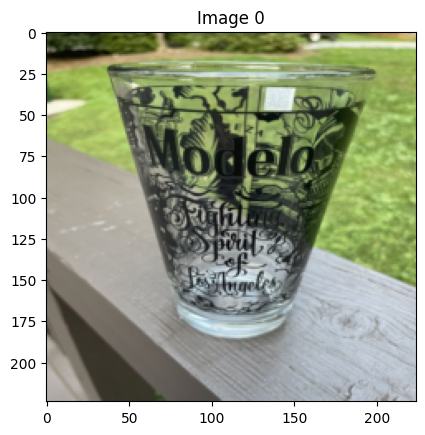

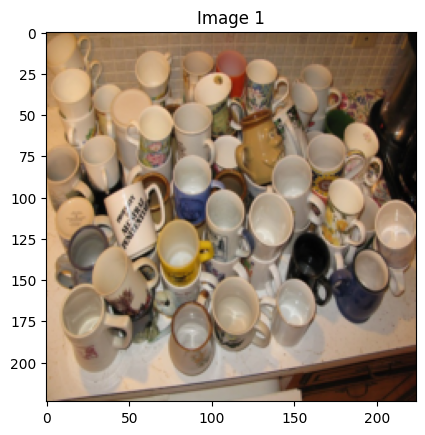

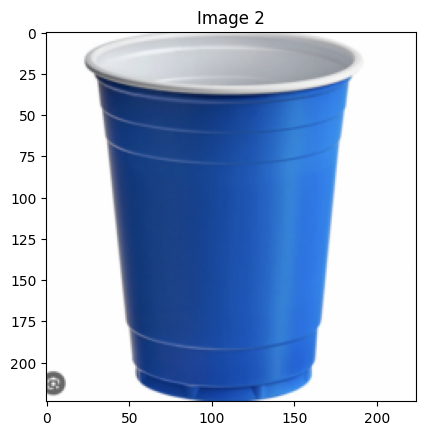

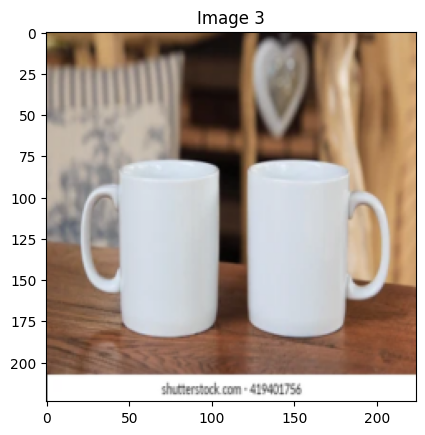

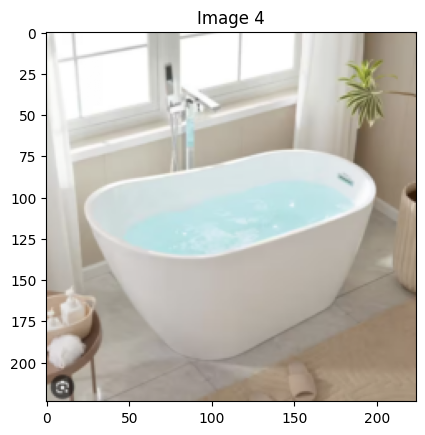

In [73]:
cup_dir = 'sample_images/cup_images'
new_cup_images = ['beer.png','many_cups.png','blue_cup.png','two_cups.png','tub.png']
random_dir = 'sample_images/random_images'
random_images = ['banana.png', 'brocolli.png', 'cat.png', 'dog.png', 'hen.png', 'salamander.png']

percent_change_cup = []

for idx, image_path in enumerate(new_cup_images):
    vanilla, abl = ablate_and_get_logit_diff(image_path, idx, cup_dir)

    percent_change_cup.append(percent_change(vanilla, abl))


Image 0. Prediction banana
Vanilla logit diff -2.6457634
Ablated logit diff -2.8439617
-2.6457634 -2.8439617
percent change -7.491157948970795 %
Image 1. Prediction broccoli
Vanilla logit diff -3.1930046
Ablated logit diff -3.2436523
-3.1930046 -3.2436523
percent change -1.586209237575531 %
Image 2. Prediction tabby
Vanilla logit diff -4.700094
Ablated logit diff -4.7002716
-4.700094 -4.7002716
percent change -0.0037740395782748237 %
Image 3. Prediction Labrador_retriever
Vanilla logit diff -5.9720116
Ablated logit diff -5.964281
-5.9720116 -5.964281
percent change 0.12944522313773632 %
Image 4. Prediction hen
Vanilla logit diff -5.4532566
Ablated logit diff -5.4404564
-5.4532566 -5.4404564
percent change 0.23472609464079142 %
Image 5. Prediction spotted_salamander
Vanilla logit diff -8.526264
Ablated logit diff -8.515148
-8.526264 -8.515148
percent change 0.13037394965067506 %


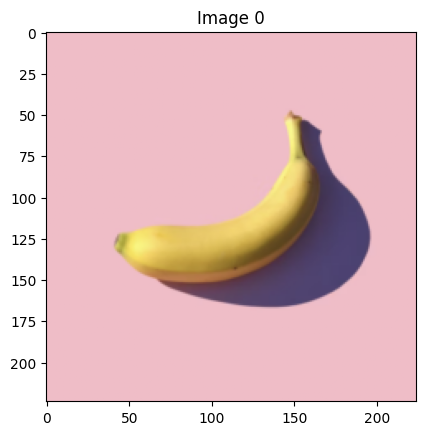

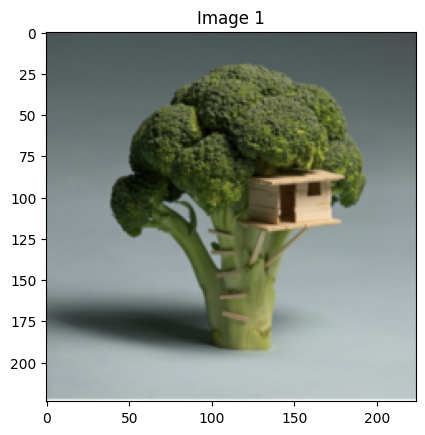

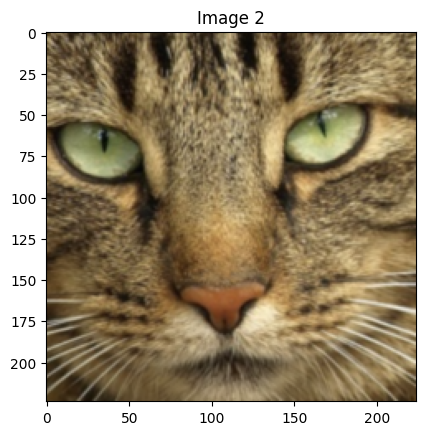

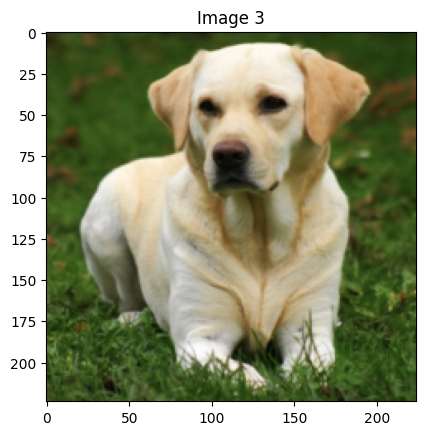

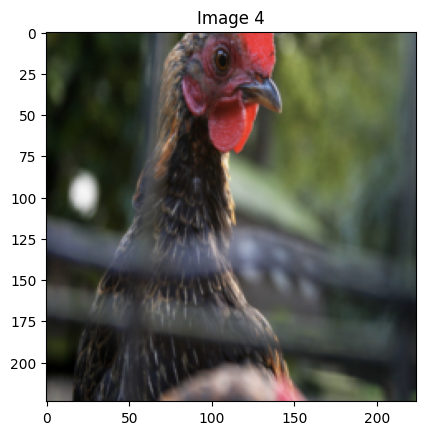

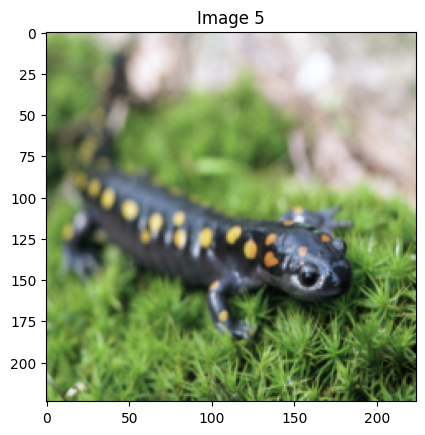

In [74]:
percent_change_random = []
for idx, image_path in enumerate(random_images):
    vanilla, abl = ablate_and_get_logit_diff(image_path, idx, random_dir)
    print(vanilla, abl)

    pc = percent_change(vanilla, abl)
    print("percent change", pc, "%")
    percent_change_random.append(pc)


Image 0. Prediction dogsled
Vanilla logit diff -4.1583633
Ablated logit diff -4.1552505
Image 1. Prediction Chihuahua
Vanilla logit diff -4.9714394
Ablated logit diff -4.9779835


Image 2. Prediction Siberian_husky
Vanilla logit diff -5.1753635
Ablated logit diff -5.1761036
Image 3. Prediction dalmatian
Vanilla logit diff -5.7269726
Ablated logit diff -5.755865


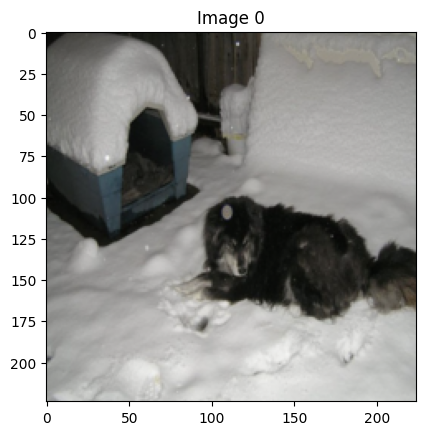

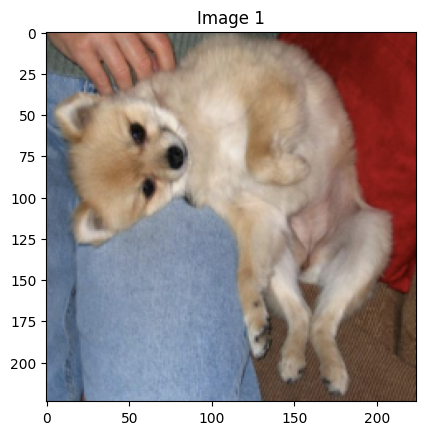

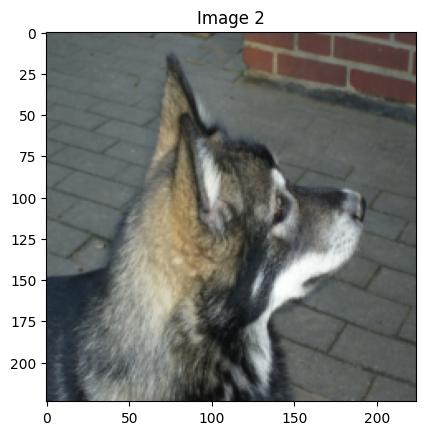

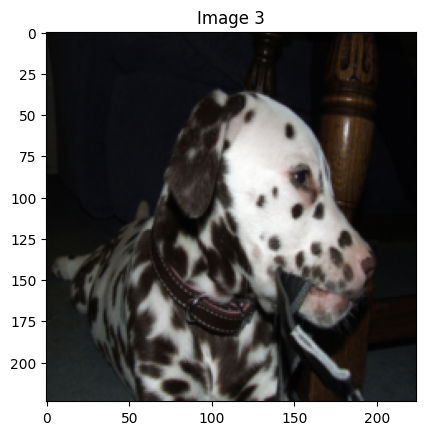

In [75]:
dog_dir = 'sample_images/dog_images'
percent_change_dog = []
for idx, image_path in enumerate(os.listdir(dog_dir)):
    vanilla, abl = ablate_and_get_logit_diff(image_path, idx, dog_dir)
    percent_change_dog.append(percent_change(vanilla, abl))


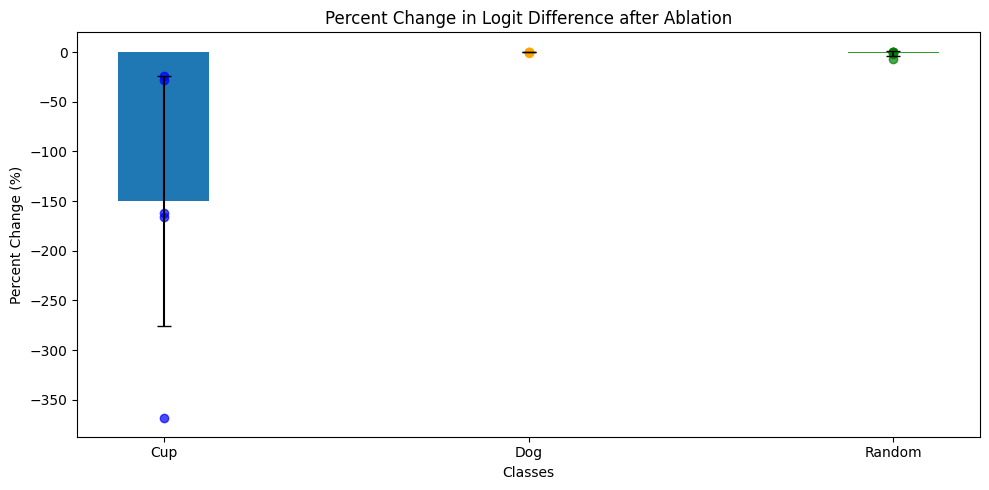

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have these arrays/lists
# percent_change_cup, percent_change_dog, percent_change_random

labels = ['Cup', 'Dog', 'Random']
n_groups = len(labels)  # number of groups
width = 0.25  # the width of the bars

# Calculate means and standard deviations for each category
mean_cup, sd_cup = np.mean(percent_change_cup), np.std(percent_change_cup)
mean_dog, sd_dog = np.mean(percent_change_dog), np.std(percent_change_dog)
mean_random, sd_random = np.mean(percent_change_random), np.std(percent_change_random)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Define x positions for each group
x = np.arange(n_groups)

# Bar plot for means with error bars, and scatter plot for individual data points
rects1 = ax.bar(x[0], mean_cup, width, yerr=sd_cup, label='Cup Mean', capsize=5)
scatter_cup = ax.scatter([x[0]]*len(percent_change_cup), percent_change_cup, color='blue', alpha=0.7)

rects2 = ax.bar(x[1], mean_dog, width, yerr=sd_dog, label='Dog Mean', capsize=5)
scatter_dog = ax.scatter([x[1]]*len(percent_change_dog), percent_change_dog, color='orange', alpha=0.7)

rects3 = ax.bar(x[2], mean_random, width, yerr=sd_random, label='Random Mean', capsize=5)
scatter_random = ax.scatter([x[2]]*len(percent_change_random), percent_change_random, color='green', alpha=0.7)

# Add labels and title
ax.set_ylabel('Percent Change (%)')
ax.set_title('Percent Change in Logit Difference after Ablation')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Classes')
# ax.legend()

# Adjust layout and show plot
fig.tight_layout()
plt.show()


## Histogram

Let's check a histogram of all the neuron's activations, color-coded by cup and non-cup classes.

In [105]:

# Filter for neuron_idx 128
filtered_df = loaded[loaded['neuron_idx'] == 128]

# Classify into 'cup' and 'non-cup'
filtered_df['class_type'] = filtered_df['class_name'].apply(lambda x: 'cup' if x in cup_classes else 'non-cup')

# Extract activation values for each class
activation_values_cup = filtered_df[filtered_df['class_type'] == 'cup']['activation_value']
activation_values_non_cup = filtered_df[filtered_df['class_type'] == 'non-cup']['activation_value']


/home/mila/s/sonia.joseph/ViT-Planetarium/env/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [116]:
import plotly
import plotly.graph_objects as go

# Assuming activation_values_cup and activation_values_non_cup are already defined

# Create traces for 'cup' and 'non-cup' classes

# number_of_bins = 50

trace_non_cup = go.Histogram(
    x=activation_values_non_cup,
    name='Non-Cup',
    opacity=0.6,
    marker=dict(color='orange'),
    # nbinsx = number_of_bins
)

trace_cup = go.Histogram(
    x=activation_values_cup,
    name='Cup',
    opacity=0.9,
    marker=dict(color='blue'),
    # nbinsx = number_of_bins

)


# Create the figure and add traces
fig = go.Figure(data=[trace_cup, trace_non_cup])

# Update layout for better visualization
fig.update_layout(
    title_text='Activation Values for Neuron 128',
    xaxis_title_text='Activation Value',
    yaxis_title_text='Count',
    barmode='overlay'
)

# Show the figure
fig.show()


In [ ]:
# Try a logit lens?

